In [1]:
#import data from mongodb to csv file

In [6]:
import pandas as pd
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
import pymongo
from pymongo import MongoClient

client = MongoClient()
db = client.tripadvisor
collection = db.review_restaurant
data = pd.DataFrame(list(collection.find({}, {'_id': False})))
data.to_csv('reviews.csv', index=False, encoding ="utf-8")

In [ ]:
#create pandas dataframe

In [7]:
df = pd.read_csv("reviews.csv")
df

,city,price,rating,restaurant,review_desc,title_review
0,"[Yogyakarta 55284, ]",[€],[5.0 ],[Sate Ratu],"[Satenya lain dr pd yg lain, one of the best s...","[Satenya montok n empuk, The Best Satay in Tow..."
1,"[Bogor, ]",[€€ - €€€],[4.0 ],[Two Story Cafe],[Came here Saturday night at the high recommen...,"[Hang Out for All Reasons, A nice place for lu..."
2,"[Bogor 16122, ]",[€€ - €€€],[3.5 ],[Ayam Goreng Fatmawati],[Ayam Goreng Fatmawati is one good place foods...,"[Lunch with friends, Legendary Sundanese Food ..."
3,"[Bogor, ]",[],[4.0 ],[Bakso Goendoel],[],[]
4,"[Bogor, ]",[],[4.0 ],[Toge Goreng Ibu Hj. Omah],[],[]
5,"[Bogor, ]",[],[4.0 ],[Ba'so Seuseupan],[],[]
6,"[Riau Islands Province 29453, ]",[€€ - €€€],[4.5 ],[Bella Italia Ristorante Italiano],[Great place to eat would recommend it highly....,"[Very nice, Bella Italia Batam, Highly recomme..."
7,"[Jakarta 10220, ]",[€€ - €€€],[5.0 ],[La Brasserie Restaurant],[Perfect place to have dinner....\nGreat food ...,"[Anniversary Dinner, Favorite place to eat, br..."
8,"[Surabaya 60285, ]",[€€ - €€€],[5.0 ],[Steak Hut Manyar Kertoarjo],[Relatively affordable choice for a steak dinn...,"[Nice Place, Nice place, Nice place to go , Gr..."
9,"[Ubud 80561, ]",[€€ - €€€],[5.0 ],[Alam De Ubud],[Tuna gatal dan oglio olio kurang testy cuma i...,"[Note recommend for the food., Bike tour 🚴🏻‍♀️..."


In [ ]:
#preprocess the data and split the words

In [8]:
import string
from nltk.stem import PorterStemmer
import numpy as np

df.columns = ['city', 'price', 'rating','restaurant', 'review_desc', 'title_review']
#df['title_review1'] = df['title_review'].str.lower().str.split()  
#df['review_desc1'] = df['review_desc'].str.lower().str.split()
df['city'] = df['city'].str.strip('[]').astype(str)
df['price'] = df['price'].str.strip('[]').astype(str)
df['rating'] = df['rating'].str.strip('[]').astype(str)
df['restaurant'] = df['restaurant'].str.strip('[]').astype(str)
df['review_desc'] = df['review_desc'].str.strip('[]').astype(str)
df['title_review'] = df['title_review'].str.strip('[]').astype(str)

df['title_review'] = df.title_review.str.lower().str.strip().str.split('[\W_]+')
df['review_desc'] = df.review_desc.str.lower().str.strip().str.split('[\W_]+')

stop = stopwords.words('english')
df['title_review'] = df['title_review'].apply(lambda x: [item for item in x if item not in stop])
df['review_desc'] = df['review_desc'].apply(lambda x: [item for item in x if item not in stop])

stemmer = PorterStemmer()
df['title_review'] = df['title_review'].apply(lambda x: [stemmer.stem(y) for y in x])
df['review_desc'] = df['review_desc'].apply(lambda x: [stemmer.stem(y) for y in x])

#df['title_review1'] = df.title_review.str.replace('"', '')
#df['review_desc1'] = df.review_desc.str.replace('"', '')
#df['title_review1'] = df['title_review'].applymap(lambda x: x.replace('"', ''))
#df['review_desc1'] = df['review_desc'].applymap(lambda x: x.replace('"', ''))

#city
df['city'] = df.city.str.lower()
df.loc[df['city'].str.contains('yogyakarta', na=False), 'city'] = 'yogyakarta'
df.loc[df['city'].str.contains('bogor', na=False), 'city'] = 'bogor'
df.loc[df['city'].str.contains('jakarta', na=False), 'city'] = 'jakarta'
df.loc[df['city'].str.contains('riau', na=False), 'city'] = 'batam'
df.loc[df['city'].str.contains('ubud', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('legian', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('seminyak', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('nusa dua', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('denpasar', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('bandung', na=False), 'city'] = 'bandung'
df.loc[df['city'].str.contains('surabaya', na=False), 'city'] = 'surabaya'
df.loc[df['city'].str.contains('kuta', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('semarang', na=False), 'city'] = 'semarang'
df.loc[df['city'].str.contains('malang', na=False), 'city'] = 'malang'
df.loc[df['city'].str.contains('medan', na=False), 'city'] = 'medan'
df.loc[df['city'].str.contains('solo', na=False), 'city'] = 'solo'
df.loc[df['city'].str.contains('canggu', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('jimbaran', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('palembang', na=False), 'city'] = 'palembang'  
df.loc[df['city'].str.contains('pecatu', na=False), 'city'] = 'bali'   
df.loc[df['city'].str.contains('tanjung benoa', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('sukawati', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('kerobokan', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('ungasan', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('80', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('mengwi', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('tabanan', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('bedugul', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('padangbai', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('uluwatu', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('tegalalang', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('singaraja', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('083', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('821', na=False), 'city'] = 'bali'
df.loc[df['city'].str.contains('tibubeneng', na=False), 'city'] = 'bali'

#price
df.loc[df['price'] == '€', 'price'] = 'cheap eats'
df.loc[df['price'] == '€€ - €€€', 'price'] = 'mid range'
df.loc[df['price'] == '€€€€', 'price'] = 'fine dining'

#rating
df = df[df.rating.str.len() > 0]
df.loc[df['rating'] == '4.0 ', 'rating'] = '4.0'
df.loc[df['rating'] == '4.5 ', 'rating'] = '4.5'
df.loc[df['rating'] == '3.5 ', 'rating'] = '3.5'
df.loc[df['rating'] == '5.0 ', 'rating'] = '5.0'
df.loc[df['rating'] == '3.0 ', 'rating'] = '3.0'
df.loc[df['rating'] == '2.5 ', 'rating'] = '2.5'
df.loc[df['rating'] == '2.0 ', 'rating'] = '2.0'
df.loc[df['rating'] == '1.0 ', 'rating'] = '1.0'
df.loc[df['rating'] == '1.5 ', 'rating'] = '1.5'
df.loc[df['rating'] == ' ', 'rating'] = np.NaN
#convert pre-process data to csv
df.to_csv("reviewsresto_stem.csv", index=False, encoding ="utf-8")

/home/finasu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/finasu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/finasu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/finasu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be s

In [ ]:
#put in mongodb

In [ ]:
client = MongoClient()
db = client.tripadvisor
collection = db.preprocess_review_stem
collection.insert_many(df.to_dict('records'))

In [9]:
#prepocess using panda for city
citydf = pd.read_csv("reviewsresto_stem.csv")
citydf

,city,price,rating,restaurant,review_desc,title_review
0,yogyakarta,cheap eats,5.0,Sate Ratu,"[satenya, lain, dr, pd, yg, lain, one, best, s...","[satenya, montok, n, empuk, best, satay, town,..."
1,bogor,mid range,4.0,Two Story Cafe,"[came, saturday, night, high, recommend, hotel...","[hang, reason, nice, place, lunch, cafe, food,..."
2,bogor,mid range,3.5,Ayam Goreng Fatmawati,"[ayam, goreng, fatmawati, one, good, place, fo...","[lunch, friend, legendari, sundanes, food, tow..."
3,bogor,NaN,4.0,Bakso Goendoel,[],[]
4,bogor,NaN,4.0,Toge Goreng Ibu Hj. Omah,[],[]
5,bogor,NaN,4.0,Ba'so Seuseupan,[],[]
6,batam,mid range,4.5,Bella Italia Ristorante Italiano,"[great, place, eat, would, recommend, highli, ...","[nice, bella, italia, batam, highli, recommend..."
7,jakarta,mid range,5.0,La Brasserie Restaurant,"[perfect, place, dinner, great, food, great, s...","[anniversari, dinner, favorit, place, eat, bru..."
8,surabaya,mid range,5.0,Steak Hut Manyar Kertoarjo,"[rel, afford, choic, steak, dinner, good, tast...","[nice, place, nice, place, nice, place, go, gr..."
9,bali,mid range,5.0,Alam De Ubud,"[tuna, gatal, dan, oglio, olio, kurang, testi,...","[note, recommend, food, bike, tour, rib, hidde..."


In [ ]:
#shows restaurant percity

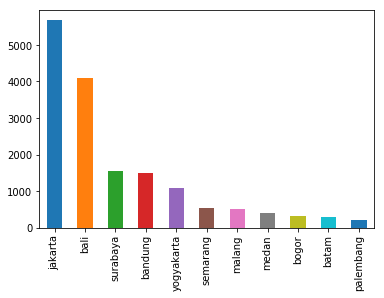

In [10]:
#showing rating
%matplotlib inline
import os
import glob
import matplotlib as mpl

citydf['city'].value_counts().plot.bar();

In [ ]:
#seperate word to rows

In [70]:
rows = list()
for row in citydf[['rating','price','city', 'review_desc']].iterrows():
    r = row[1]
    for word in r.review_desc.split(','):
        rows.append((r.rating, r.price, r.city, word))

review_words = pd.DataFrame(rows, columns=['rating','price','city', 'review_desc'])
review_words['review_desc'] = review_words['review_desc'].str.strip('[]').astype(str)
review_words['review_desc'] = review_words.review_desc.str.replace("'", '')
review_words

,rating,price,city,review_desc
0,5.0,cheap eats,yogyakarta,satenya
1,5.0,cheap eats,yogyakarta,lain
2,5.0,cheap eats,yogyakarta,dr
3,5.0,cheap eats,yogyakarta,pd
4,5.0,cheap eats,yogyakarta,yg
5,5.0,cheap eats,yogyakarta,lain
6,5.0,cheap eats,yogyakarta,one
7,5.0,cheap eats,yogyakarta,best
8,5.0,cheap eats,yogyakarta,satay
9,5.0,cheap eats,yogyakarta,jogja


In [71]:
#remove null values
review_words = review_words[review_words.review_desc.str.len() > 0]
print review_words

        rating       price        city    review_desc
0          5.0  cheap eats  yogyakarta        satenya
1          5.0  cheap eats  yogyakarta           lain
2          5.0  cheap eats  yogyakarta             dr
3          5.0  cheap eats  yogyakarta             pd
4          5.0  cheap eats  yogyakarta             yg
5          5.0  cheap eats  yogyakarta           lain
6          5.0  cheap eats  yogyakarta            one
7          5.0  cheap eats  yogyakarta           best
8          5.0  cheap eats  yogyakarta          satay
9          5.0  cheap eats  yogyakarta          jogja
10         5.0  cheap eats  yogyakarta   pelayanannya
11         5.0  cheap eats  yogyakarta            pun
12         5.0  cheap eats  yogyakarta          ramah
13         5.0  cheap eats  yogyakarta           back
14         5.0  cheap eats  yogyakarta           soon
15         5.0  cheap eats  yogyakarta          first
16         5.0  cheap eats  yogyakarta         experi
17         5.0  cheap eats  

In [ ]:
#counts each word per city

In [72]:
#review_counts = pd.DataFrame(review_words.groupby('city')\
#    .review_desc.value_counts()\
#    .to_frame()\
#    .rename(columns={'review_desc':'count'})\
#    .astype(int))


review_counts = pd.DataFrame(review_words.groupby("city").review_desc.value_counts().reset_index(name="count"))
print review_counts

             city review_desc  count
0            bali        food   9223
1            bali        good   6027
2            bali       place   5081
3            bali       great   4446
4            bali     restaur   3839
5            bali       staff   3309
6            bali      servic   3006
7            bali         ...   2865
8            bali       price   2865
9            bali        nice   2815
10           bali        time   2643
11           bali        love   2458
12           bali    friendli   2371
13           bali      realli   2165
14           bali        bali   2090
15           bali         tri   1979
16           bali      delici   1902
17           bali       order   1826
18           bali         one   1699
19           bali        best   1664
20           bali        menu   1662
21           bali   recommend   1646
22           bali       visit   1627
23           bali        tast   1592
24           bali      dinner   1567
25           bali        meal   1501
2

In [89]:
review_counts.loc[review_counts['city'] == 'palembang']

,city,review_desc,count
46891,palembang,pempek,95
46893,palembang,tast,82
46895,palembang,tri,70
46897,palembang,one,59
46898,palembang,delici,56
46899,palembang,nice,56
46900,palembang,price,50
46901,palembang,pindang,46
46902,palembang,serv,46
46903,palembang,fish,45


In [74]:
#remove uneccessary words-bali: food, good, place, restaur, ..., realli, bali
review_counts = review_counts.drop([0, 1, 2, 4, 7, 13, 14], axis=0)

#remove uneccessary words-jakarta: food, good, place, restaur, blank, ..., also, jakarta
review_counts = review_counts.drop([26385, 26386, 26387, 26388, 26395, 26399, 26400, 26404], axis=0)

#remove uneccessary words-surabaya: food, good, place, restaur, surabaya, blank, ...
review_counts = review_counts.drop([51843, 51844, 51845, 51847, 51849, 51850, 51860], axis=0)

#remove uneccessary words-bandung: food, good, place, restaur, bandung, also, blank, ...
review_counts = review_counts.drop([14270, 14271, 14272, 14273, 14276, 14281, 14282, 14283], axis=0)

#remove uneccessary words-yogyakarta: food, good, place, restaur, ..., blank, realli, yogyakarta, also, jogja
review_counts = review_counts.drop([57866, 57867, 57868, 57869, 57876, 57878, 57880, 57892, 57884, 57902], axis=0)

#remove uneccessary words-semarang: food, good, place, semarang, restaur, blank, ..., also, realli
review_counts = review_counts.drop([48466, 48467, 48468, 48470, 48471, 48475, 48483, 48493], axis=0)

#remove uneccessary words-malang: food, good, place, malang, restaur, blank, ..., also, realli
review_counts = review_counts.drop([40471, 40472, 40473, 40475, 40476, 40478, 40482, 40486, 40488], axis=0)

#remove uneccessary words-medan: food, good, place, restaur, medan, blank, also, ..., realli
review_counts = review_counts.drop([43606, 43607, 43608, 43609, 43611, 43618, 43621, 43623, 43634], axis=0)

#remove uneccessary words-bogor: food, good, place, bogor, restaur, blank, ..., also
review_counts = review_counts.drop([23768, 23769, 23770, 23772, 23773, 23776, 23779, 23785], axis=0)

#remove uneccessary words-batam: food, good, place, restaur, batam, blank, also, ..., realli
review_counts = review_counts.drop([20871, 20872, 20873, 20874, 20875, 20884, 20885, 20892, 20894], axis=0)

#remove uneccessary words-palembang: food, palembang, place, good, restaur, blank, also, ...
review_counts = review_counts.drop([46888, 46889, 46890, 46892, 46894, 46896, 46906, 46915], axis=0)

In [90]:
#reset_index
review_counts = review_counts.reset_index(drop=True)
review_counts

,city,review_desc,count
0,bali,great,4446
1,bali,staff,3309
2,bali,servic,3006
3,bali,price,2865
4,bali,nice,2815
5,bali,time,2643
6,bali,love,2458
7,bali,friendli,2371
8,bali,tri,1979
9,bali,delici,1902


In [ ]:
#put this data to mongodb

In [61]:
client = MongoClient()
db = client.tripadvisor
collection = db.city_review
collection.insert_many(review_counts.to_dict('records'))

In [ ]:
#create csv file

In [92]:
review_counts.to_csv("city_words.csv", index=False, encoding ="utf-8")

In [ ]:
#word sum per city

In [62]:
word_sum = pd.DataFrame(review_counts.groupby("city").sum().reset_index().rename(columns={'count': 'city_count'}))
word_sum

,city,city_count
0,bali,303820
1,bandung,65513
2,batam,14456
3,bogor,12326
4,jakarta,255693
5,malang,16879
6,medan,17475
7,palembang,5268
8,semarang,19693
9,surabaya,52472


In [ ]:
#calculate tf value

In [63]:
tf = pd.DataFrame(review_counts.merge(word_sum, on='city'))
tf['tf'] = tf['count']/tf['city_count']

tf

,city,review_desc,count,city_count,tf
0,bali,great,4446,303820,0.014634
1,bali,staff,3309,303820,0.010891
2,bali,servic,3006,303820,0.009894
3,bali,price,2865,303820,0.009430
4,bali,nice,2815,303820,0.009265
5,bali,time,2643,303820,0.008699
6,bali,love,2458,303820,0.008090
7,bali,friendli,2371,303820,0.007804
8,bali,tri,1979,303820,0.006514
9,bali,delici,1902,303820,0.006260


In [64]:
#number of city
c_d = review_words.city.nunique()
c_d

11

In [ ]:
#create idf dataframe

In [65]:
idf = review_words.groupby('review_desc')\
    .city\
    .nunique()\
    .reset_index()\
    .rename(columns={'city':'i_d'})\
    .sort_values('i_d')
print idf

        review_desc  i_d
15953           ole    0
17353        plural    0
22878        toorak    0
9099            gfc    0
19352       sangant    0
22652          tigo    0
12983         layov    0
4420     cappuchino    0
19344       sandpit    0
13348          loce    0
16508       pannini    0
13099     lengthwis    0
18315       recieiv    0
26837         tommi    0
9093          geuli    0
25480          chic    0
14138          maui    0
4091         bunana    0
18954     rotesseri    0
4872           chep    0
10447         hotei    0
5754       cornbeef    0
19845       senggal    0
26397            pj    0
22612           tia    0
11486         jeson    0
17997    quesidilla    0
15133        muttin    0
23000   traditionel    0
17207         piopl    0
...             ...  ...
9032          gener   11
24231          warm   11
9088            get   11
24208          want   11
24206         wanna   11
9173           give   11
24339       weekend   11
8702          fruit   11


In [ ]:
#calculate idf by adding the column to idf dataframe

In [66]:
idf['idf'] = np.log(c_d/idf.i_d)

idf

,review_desc,i_d,idf
15953,ole,0,inf
17353,plural,0,inf
22878,toorak,0,inf
9099,gfc,0,inf
19352,sangant,0,inf
22652,tigo,0,inf
12983,layov,0,inf
4420,cappuchino,0,inf
19344,sandpit,0,inf
13348,loce,0,inf


In [67]:
#remove blank words
idf = idf.drop([0], axis=0)
idf

,review_desc,i_d,idf
15953,ole,0,inf
17353,plural,0,inf
22878,toorak,0,inf
9099,gfc,0,inf
19352,sangant,0,inf
22652,tigo,0,inf
12983,layov,0,inf
4420,cappuchino,0,inf
19344,sandpit,0,inf
13348,loce,0,inf


In [ ]:
#merge the dataframe in new dataframe tf_idf

In [68]:
tf_idf = pd.DataFrame(tf.merge(idf, on='review_desc'))
tf_idf

,city,review_desc,count,city_count,tf,i_d,idf
0,bali,great,4446,303820,0.014634,11,0.000000
1,bandung,great,432,65513,0.006594,11,0.000000
2,batam,great,93,14456,0.006433,11,0.000000
3,bogor,great,57,12326,0.004624,11,0.000000
4,jakarta,great,1609,255693,0.006293,11,0.000000
5,malang,great,105,16879,0.006221,11,0.000000
6,medan,great,113,17475,0.006466,11,0.000000
7,palembang,great,31,5268,0.005885,11,0.000000
8,semarang,great,111,19693,0.005637,11,0.000000
9,surabaya,great,315,52472,0.006003,11,0.000000


In [ ]:
#count tf_idf

In [69]:
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf

,city,review_desc,count,city_count,tf,i_d,idf,tf_idf
0,bali,great,4446,303820,0.014634,11,0.000000,0.00000
1,bandung,great,432,65513,0.006594,11,0.000000,0.00000
2,batam,great,93,14456,0.006433,11,0.000000,0.00000
3,bogor,great,57,12326,0.004624,11,0.000000,0.00000
4,jakarta,great,1609,255693,0.006293,11,0.000000,0.00000
5,malang,great,105,16879,0.006221,11,0.000000,0.00000
6,medan,great,113,17475,0.006466,11,0.000000,0.00000
7,palembang,great,31,5268,0.005885,11,0.000000,0.00000
8,semarang,great,111,19693,0.005637,11,0.000000,0.00000
9,surabaya,great,315,52472,0.006003,11,0.000000,0.00000


In [95]:
#sort the value based on tf-idf score
tf_idf = tf_idf.sort_values('tf_idf', ascending=False)
tf_idf

,city,review_desc,count,city_count,tf,i_d,idf,tf_idf
43186,palembang,pindang,46,5268,0.008732,6,0.606136,0.005293
51420,batam,nagoya,44,14456,0.003044,2,1.704748,0.005189
60756,palembang,belida,8,5268,0.001519,1,2.397895,0.003641
25331,palembang,pempek,95,5268,0.018033,9,0.200671,0.003619
702,bali,ubud,749,303820,0.002465,3,1.299283,0.003203
47563,palembang,ampera,12,5268,0.002278,4,1.011601,0.002304
54255,palembang,musi,7,5268,0.001329,2,1.704748,0.002265
2663,bali,canggu,266,303820,0.000876,1,2.397895,0.002099
47341,bandung,dago,55,65513,0.000840,1,2.397895,0.002013
1963,bali,seminyak,350,303820,0.001152,2,1.704748,0.001964


In [96]:
#reset index
tf_idf = tf_idf.reset_index(drop=True)
tf_idf

,city,review_desc,count,city_count,tf,i_d,idf,tf_idf
0,palembang,pindang,46,5268,0.008732,6,0.606136,0.005293
1,batam,nagoya,44,14456,0.003044,2,1.704748,0.005189
2,palembang,belida,8,5268,0.001519,1,2.397895,0.003641
3,palembang,pempek,95,5268,0.018033,9,0.200671,0.003619
4,bali,ubud,749,303820,0.002465,3,1.299283,0.003203
5,palembang,ampera,12,5268,0.002278,4,1.011601,0.002304
6,palembang,musi,7,5268,0.001329,2,1.704748,0.002265
7,bali,canggu,266,303820,0.000876,1,2.397895,0.002099
8,bandung,dago,55,65513,0.000840,1,2.397895,0.002013
9,bali,seminyak,350,303820,0.001152,2,1.704748,0.001964


In [ ]:
#put the city tf-idf dataset to mongodb

In [97]:
client = MongoClient()
db = client.tripadvisor
collection = db.city_tfidf
collection.insert_many(tf_idf.to_dict('records'))

In [ ]:
#create csv file

In [98]:
tf_idf.to_csv("city_tfidf.csv", index=False, encoding ="utf-8")